# Large Movie Review Dataset
This is a dataset for binary sentiment classification containing substantially more data. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

Link: http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.3.0


In [ ]:
#if "Import error is foundtError: IProgress not found. Please update jupyter and ipywidgets." error is found
# Then goto cmd(in your base dir) and run following lines

# conda install -c conda-forge ipywidgets
# jupyter nbextension enable --py widgetsnbextension

In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to C:\/Users/SAM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ10XJ8/imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\/Users/SAM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ10XJ8/imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\/Users/SAM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ10XJ8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\SAM\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [4]:
imdb

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [8]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


for sentence,label in train_data:
    training_sentences.append(sentence.numpy().decode('utf8'))
    training_labels.append(label.numpy())

for sentence,label in test_data:
    testing_sentences.append(sentence.numpy().decode('utf8'))
    testing_labels.append(label.numpy())
    

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [13]:
print(training_sentences[:2])
print('\n')
print(training_labels[:2])

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [16]:
print(training_labels_final.shape)
print(testing_labels_final.shape)

(25000,)
(25000,)


In [46]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<00V>"

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokonization and padding on Training data 
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


# Padding on testing data 
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [52]:
#word_index

In [22]:
# Let's test
dic = {'Hello':1,
      'World':2,
      'I':3,
      'am':4,
      'new!':5}

In [27]:
new_dic = dict([(value, key)  for (key, value) in dic.items()])

In [31]:
print('dic', dic)
print('new_dic', new_dic)

dic {'Hello': 1, 'World': 2, 'I': 3, 'am': 4, 'new!': 5}
new_dic {1: 'Hello', 2: 'World', 3: 'I', 4: 'am', 5: 'new!'}


### Convert (key,value) to (value, key) in our imdb_review dataset "word_index"

In [54]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#reverse_word_index

### Decode review

In [55]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [56]:
padded[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   12,    7,
          2,  241,    5,   20,   16,    4, 8776, 2707, 2653,   52,    2,
        358,    5,    2,  180,   68,  138, 1401,   17,   92,  203,  968,
         15,   23,    1,   81,    4,  192, 3109, 3037,    3,    1,   16,
          4,  376,    5,  632,  387,  352,   37, 6355,    3, 5559, 1928,
         15,  208, 8596, 3433,    2,  112,  365,   48,   24,   55,    1,
          6, 1657,   55, 1818, 4312,   41,    4, 2263,    3, 1908,    1,
        141,  160,  780,  111,   31,   92,  116,    4,  221,   20,    9,
        173,  279,    3,   29,   13, 1012,    2, 2814,   10, 1985])

In [57]:
# let's pass the padded[3] for decoding

print(decode_review(padded[3]))
print('\n')
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <00V> into a big arm chair and <00V> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <00V> to cross no dangerous waters just a warm and witty <00V> through new york life at its best a family film in every sense and one that deserves the praise it received


This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


### Build Model

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [59]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.5006 - accuracy: 0.7367 - val_loss: 0.3423 - val_accuracy: 0.8510
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.2339 - accuracy: 0.9101 - val_loss: 0.3709 - val_accuracy: 0.8404
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9807 - val_loss: 0.4602 - val_accuracy: 0.8267
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9979 - val_loss: 0.5239 - val_accuracy: 0.8289
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.5802 - val_accuracy: 0.8283
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.6327 - val_accuracy: 0.8271
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 9.6148e-04 - accuracy: 1.0000 - val_loss: 0.6909 - val_accuracy: 0.8263
Ep

In [61]:
import pandas as pd
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

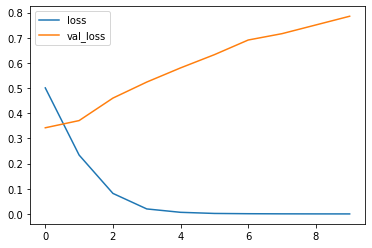

In [67]:
model_loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

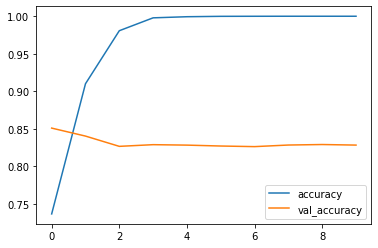

In [68]:
model_loss[['accuracy', 'val_accuracy']].plot()

In [69]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


### Preparing of Meta data

In [71]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [73]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

In [74]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


### Go to https://projector.tensorflow.org/
    
**Load 'vecs.tsv' and 'meta.tsv'**

![](img.png?raw=true)